In [1]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 12.7 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=0ec1ec10029388a8eac7fdb3c91820eab3afa748ef821e084b83055e3a7b6a20
  Stored in directory: c:\us

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import pandas as pd
df=pd.read_csv("data/AAPL_2024.csv",parse_dates=["Date"],index_col="Date")
print(df.head(10))

              Open    High    Low   Close  Adj Close    Volume
Date                                                          
2024-01-02  187.15  189.14  186.6  188.63     188.63  57337400
2024-01-03  188.40  189.97  186.9  187.43     187.43  62194100
2024-01-04  186.72  188.50  185.2  186.50     186.50  62718100
2024-01-05  187.10  190.20  186.5  189.90     189.90  54011200
2024-01-08  190.25  192.00  189.1  191.55     191.55  49874100
2024-01-09  192.00  193.20  190.5  191.80     191.80  51200100
2024-01-10  191.50  192.70  190.8  191.00     191.00  49822000
2024-01-11  191.80  194.10  191.5  193.75     193.75  52033400
2024-01-12  194.00  195.40  192.5  193.20     193.20  50022100
2024-01-16  193.10  194.50  192.0  192.80     192.80  48222100


In [6]:
print(df.info())#查看基本信心
print(df.describe())#描述性统计
print(df.isnull().sum())#缺失值检查


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2024-01-02 to 2024-03-13
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       50 non-null     float64
 1   High       50 non-null     float64
 2   Low        50 non-null     float64
 3   Close      50 non-null     float64
 4   Adj Close  50 non-null     float64
 5   Volume     50 non-null     int64  
 6   MA7        44 non-null     float64
 7   MA30       21 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 3.5 KB
None
             Open       High         Low       Close   Adj Close  \
count   50.000000   50.00000   50.000000   50.000000   50.000000   
mean   201.990400  203.45820  201.108000  202.587200  202.587200   
std      9.222221    9.13681    9.303057    9.338516    9.338516   
min    186.720000  188.50000  185.200000  186.500000  186.500000   
25%    194.825000  196.25000  193.850000  195.575000  195.575000   
50%    201.1000

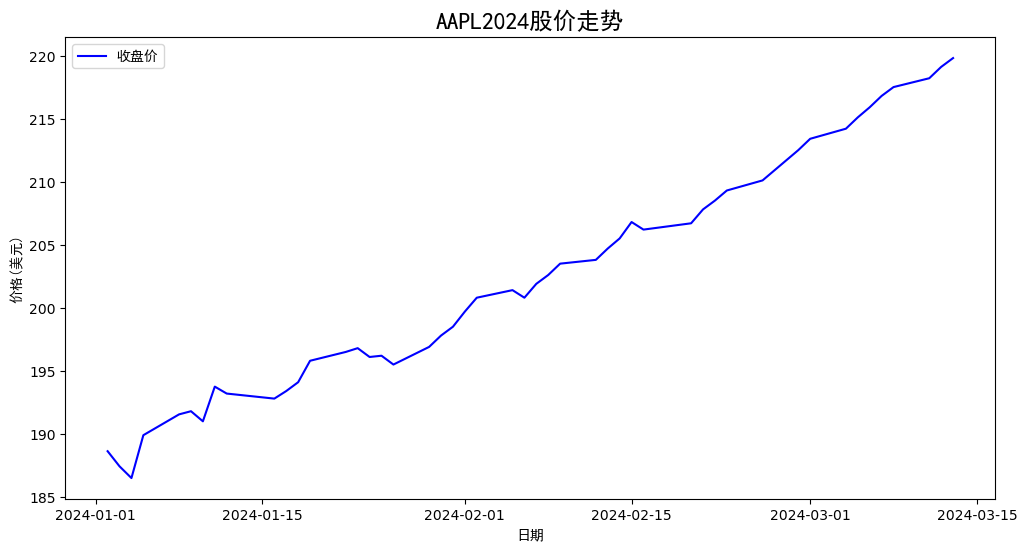

In [4]:
import matplotlib.pyplot as plt

#设置画布大小(宽12英寸，高6英寸)
plt.figure(figsize=(12,6))

#df.index:横坐标为日期, 纵坐标为收盘价,label表示图例名称为收盘价,线条颜色为蓝色
plt.plot(df.index,df["Close"],label="收盘价",color="blue")
#设置图表标题，指定中文字体为黑体，防止中文乱码 设置字体大小为17
plt.title("AAPL2024股价走势",fontproperties="SimHei",fontsize=17)
#设置x轴标签
plt.xlabel("日期",fontproperties="SimHei")
#设置y轴标签
plt.ylabel("价格(美元)",fontproperties="SimHei")
#显示图例(左上角)
plt.legend(prop={"family":"SimHei"})
#显示图表
plt.show()


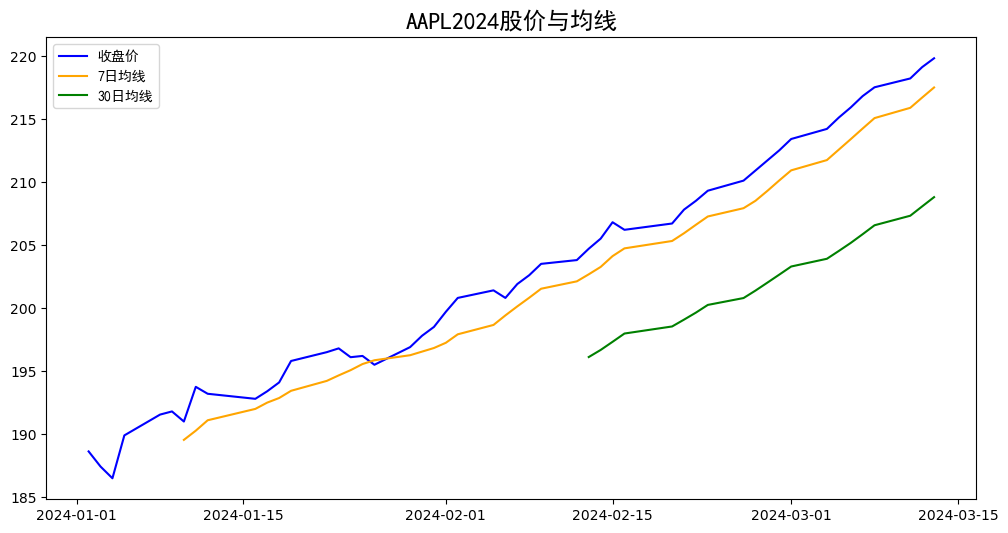

In [5]:
#计算移动平均线rolling mean
#df["Close"]以收盘价为基准，计算7天的滑动平均值. 
#rolling(7)表示以7天为一个窗口，mean()计算窗口内的均值
df["MA7"]=df["Close"].rolling(7).mean()
#同理计算30日移动平均线
df["MA30"]=df["Close"].rolling(30).mean()
#设置画布大小
plt.figure(figsize=(12,6))
#绘制收盘价折线图
plt.plot(df.index,df["Close"],label="收盘价",color="blue")
#绘制7日均线
plt.plot(df.index,df["MA7"],label="7日均线",color="orange")
#绘制30日均线
plt.plot(df.index,df["MA30"],label="30日均线",color="green")
plt.title("AAPL2024股价与均线",fontproperties="SimHei",fontsize=17)
#显示图例(左上角)
plt.legend(prop={"family":"SimHei"})
#显示图表
plt.show()